<a href="https://colab.research.google.com/github/KanVux/Spam_Email_Detection/blob/main/SpamEmailDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thu thập và tiền xử lý dữ liệu**

## Thu thập dữ liệu

In [3]:
!pip install tensorflow

In [4]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

# Load file csv vào một dataframe và hiển thị các mẫu email đầu của dataset
df = pd.read_csv('/content/drive/MyDrive/NienLuan/Dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
# Có một cột không tên chỉ có số tăng dần -> không hữu ích -> xóa bỏ
columns_need_to_drop = ['Unnamed: 0']
df.drop(columns_need_to_drop, axis=1, inplace=True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
# Kiểm tra có các email bị trùng nên cần được xóa
df[df.duplicated()]
# Loại bỏ các email bị trùng
df.drop_duplicates(inplace=True)

label
ham     3531
spam    1462
Name: count, dtype: int64


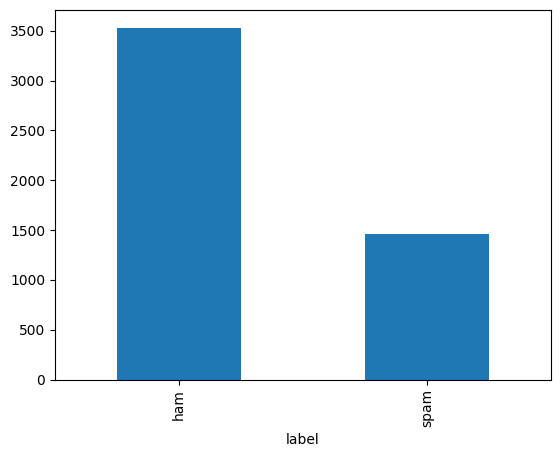

In [7]:
# Kiểm tra số lượng email có ích (ham) và email spam
df["label"].value_counts().plot(kind="bar");
dff = df["label"].value_counts()
print(dff)

In [8]:
# X = nội dung email (input: nội dung feed cho các model)
X = df['text']
# y = label_num (output: lớp cần được phân loại)
y = df['label_num']

print(X,y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object 0       0
1       0
2       0
3       1
4       0
       ..
5165    0
5166    0
5167    0
5169    0
5170    1
Name: label_num, Length: 4993, dtype: int64


## Tiền xử lý dữ liệu (Preprocessing)

In [9]:
!pip install nltk

In [10]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu NLTK cần thiết
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Lấy các từ dừng (stopwords) trong tiếng Anh
stop_word = set(stopwords.words('english'))

# Khai báo bổ đề ngôn ngữ
lemmatizer = WordNetLemmatizer()

# Loại bỏ các chữ cái lặp lại liên tiếp trong từ
def remove_duplicate_letters(text):
    """Loại bỏ các chữ cái lặp lại liên tiếp trong một từ."""
    if not text:
        return ""
    result = text[0]
    for char in text[1:]:
        if char != result[-1]:
            result += char
    return result

# Tiền xử lý dữ liệu
def preprocess_text(text):
    """Tiền xử lý chuỗi văn bản."""
    # Đổi toàn bộ chữ thành chữ thường
    text = text.lower()
    # Loại bỏ các dấu câu và ký tự đặc biệt
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text)
    # Loại bỏ các ký tự số
    text = re.sub(r'\d+', '', text)
    # Áp dụng hàm loại bỏ chữ cái lặp lại
    text = ' '.join([remove_duplicate_letters(word) for word in text.split()])
    # Tokenize từ và loại bỏ các từ dừng (stopwords)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_word]
    # Chuyển các từ về dạng nguyên bản (lemmatize)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Trả về chuỗi đã tiền xử lý
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,label_num,cleaned_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter folow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january se atached file hplnol...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window ofice cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal bok teco pvr revenu...


# **Trích xuất đặt trưng**

In [12]:
from gensim.models import Word2Vec
# Tách các Câu từ email đã được xử lý
sentences = [text.split() for text in df['cleaned_text']]
# Sử dụng Word2Vec để biến các Từ thành các Vector (100 chiều) sử dụng CBOW (sg=0)
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Hàm chuyển email thành vector
def get_email_vector(email, model):
    words = email.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        print(f"Warning: Email '{email}' has no words in the Word2Vec vocabulary.")
        return np.zeros(model.vector_size)

# Biến đổi dữ liệu
X = np.array([get_email_vector(email, word2vec_model) for email in df['cleaned_text']])
y = df['label_num']

# Lưu mô hình Word2Vec
word2vec_model.save("/content/drive/MyDrive/NienLuan/Models/word2vec_model.keras")



## Chia dữ liệu

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3994, 100), (999, 100), (3994,), (999,))

## SMOTE

In [14]:
!pip install imblearn

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit và transform trên tập huấn luyện
X_test = scaler.transform(X_test)       # Chỉ transform trên tập kiểm tra

# Áp dụng SMOTE
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra kết quả sau SMOTE
print(f"Số lượng mẫu trước SMOTE: {len(X_train)}")
print(f"Phân phối nhãn trước SMOTE: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Số lượng mẫu sau SMOTE: {len(X_train_resampled)}")
print(f"Phân phối nhãn sau SMOTE: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")


Số lượng mẫu trước SMOTE: 3994
Phân phối nhãn trước SMOTE: {0: 2834, 1: 1160}
Số lượng mẫu sau SMOTE: 5668
Phân phối nhãn sau SMOTE: {0: 2834, 1: 2834}


# Model Training

In [ ]:
!pip install transfomer
!pip install tensorflow
!pip install scikeras

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

## CNN Model

In [57]:


# Reshape dữ liệu cho phù hợp với CNN
X_train_resampled_for_cnn = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_for_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Hàm xây dựng mô hình CNN với các tham số được truyền vào
def create_model(filters1=32, filters2=64, kernel_size=3, dense_units=64, pool_size=2, optimizer='adam'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=filters1, kernel_size=kernel_size, activation='relu', input_shape=(X_train_resampled_for_cnn.shape[1], 1)),
        tf.keras.layers.MaxPooling1D(pool_size=pool_size),
        tf.keras.layers.Conv1D(filters=filters2, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=pool_size),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense_units, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Tạo KerasClassifier wrapper cho mô hình (không truyền tham số vào đây)
model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=32,epochs=10)

# Định nghĩa hyperparameters để tìm kiếm
param_grid = {
    'model__filters1': [32, 64],
    'model__filters2': [64, 128],
    'model__kernel_size': [3, 5],
    'model__pool_size': [2, 3],
    'model__dense_units': [64, 128],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__batch_size': [16, 32],
    'model__epochs': [20, 50]
}

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# Thực hiện GridSearchCV
grid_search_result = grid_search.fit(X_train_resampled_for_cnn, y_train_resampled)

# In ra các tham số tối ưu
print(f"Best Parameters: {grid_search_result.best_params_}")
print(f"Best Score: {grid_search_result.best_score_}")

# Đánh giá mô hình tốt nhất trên tập test
best_model = grid_search_result.best_estimator_
y_pred_best = (best_model.predict(X_test_for_cnn) > 0.5).astype("int32")

# Tính toán ma trận confusion và các chỉ số đánh giá khác
cm = confusion_matrix(y_test, y_pred_best)
auc_roc = roc_auc_score(y_test, y_pred_best)
print("AUC-ROC Score:", auc_roc)
print("Confusion Matrix:\n", cm)

# Tính toán precision, recall, f1-score
print(classification_report(y_test, y_pred_best))

# Vẽ đồ thị accuracy và loss từ quá trình huấn luyện
history = best_model.model.history  # Truy xuất quá trình huấn luyện từ model

# Vẽ đồ thị accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Vẽ đồ thị loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

# Lưu model
model_path = "/content/drive/MyDrive/NienLuan/Models/cnn_model_best.keras"
best_model.model.save(model_path)


ValueError: 
All the 768 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
768 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 770, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
TypeError: create_model() got an unexpected keyword argument 'batch_size'


## RNN Model

In [ ]:

# Reshape dữ liệu cho phù hợp với RNN
X_train_resampled_for_RNN = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
# Handle OOV words by replacing them with a valid index (e.g., 0)
X_train_resampled[X_train_resampled < 0] = 0
X_test[X_test < 0] = 0

# RNN Model
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word2vec_model.wv.key_to_index), output_dim=100, input_length=X_train_resampled.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model Summary
rnn_model.summary()

# Compile Model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
rnn_history = rnn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print('RNN Loss:', rnn_loss)
print('RNN Accuracy:', rnn_accuracy)

# Predict on Test Set
rnn_y_pred = (rnn_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
rnn_cm = confusion_matrix(y_test, rnn_y_pred)
print("RNN Confusion Matrix:\n", rnn_cm)

# Classification Report
print(classification_report(y_test, rnn_y_pred))

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('RNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('RNN Loss')
plt.show()

# Save Model
rnn_model.save("/content/drive/MyDrive/NienLuan/Models/rnn_model.keras")


## LSTM Model

In [ ]:
# LSTM Model
# Xây dựng mô hình LSTM
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word2vec_model.wv.key_to_index), output_dim=100, input_length=X_train_resampled.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# In model summary
lstm_model.summary()

# Compile mô hình
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
lstm_history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print('LSTM Loss:', lstm_loss)
print('LSTM Accuracy:', lstm_accuracy)

# Dự đoán trên tập kiểm tra
lstm_y_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Tính toán ma trận confusion
lstm_cm = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:\n", lstm_cm)

# Tính toán precision, recall, f1-score
print(classification_report(y_test, lstm_y_pred))

# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('LSTM Accuracy')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='loss')
plt.plot(lstm_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('LSTM Loss')
plt.show()

# Lưu model
lstm_model.save("/content/drive/MyDrive/NienLuan/Models/lstm_model.keras")

## BERT Model